In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Custom loss function (if you used one)
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.where(tf.math.is_nan(mse), 1e6, mse)  # Handle NaN values

# Load the model
model = load_model('./model_v1.h5', custom_objects={'combined_loss': combined_loss})

2024-09-09 15:48:17.284624: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 15:48:17.664786: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22474 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:4b:00.0, compute capability: 8.6


  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Image range: 0.1529 to 0.7255


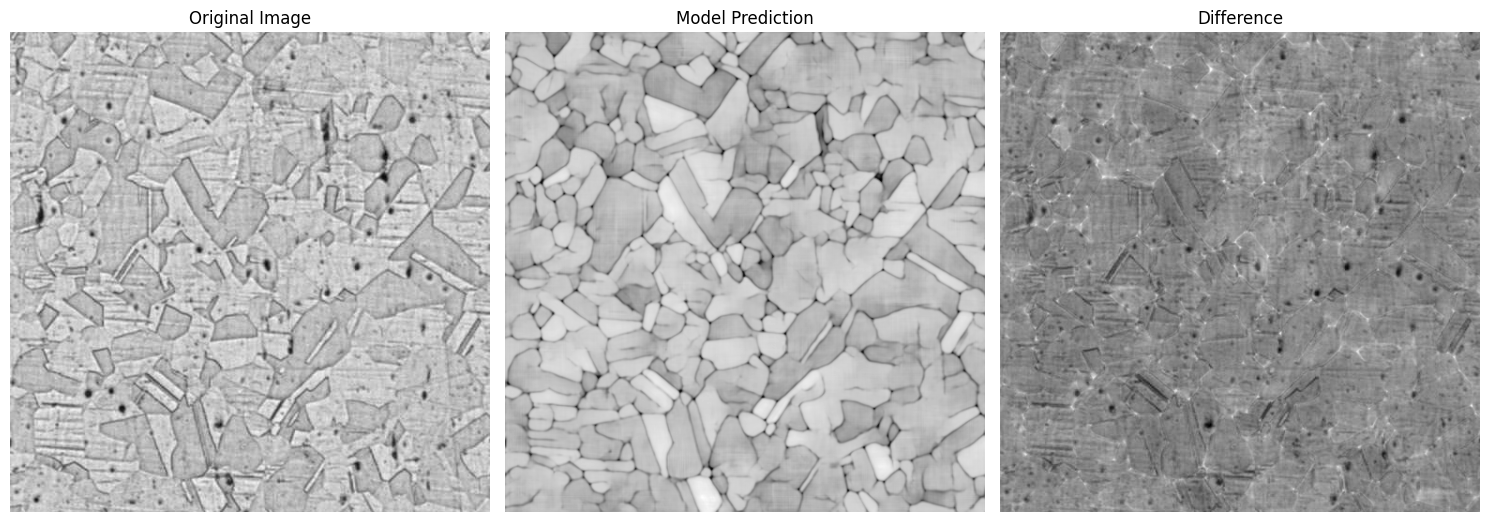

Original Image:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5675
  Std Dev: 0.0557

Model Prediction:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5656
  Std Dev: 0.0557

Difference:
  Min: -0.4022
  Max: 0.3613
  Mean: 0.0020
  Std Dev: 0.0515



In [ ]:
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.where(tf.math.is_nan(mse), 1e6, mse)  # Handle NaN values

model2 = tf.keras.models.load_model('/microstructures/optical_micro/noisy_set/model_v1.h5', custom_objects={'combined_loss': combined_loss})

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters
import tensorflow as tf

def preprocess_image(image_path):
    img = io.imread(image_path, as_gray=True)
    img = transform.resize(img, (512, 512), anti_aliasing=True)
    img = img 
    threshold = filters.threshold_otsu(img)
    binary_img = (img > threshold).astype(np.float32)
    binary_img = binary_img.reshape(1, 512, 512, 1)
    return img, binary_img

image_path = '/microstructures/optical_micro/noise_micro_shortlisted/512x512_patches/1000-5m_500-sb 50x0005_patch_x1024_y411.png'

original_img, binary_img = preprocess_image(image_path)
img = original_img.reshape(1, 512, 512, 1)

print(f"Image range: {np.min(img):.4f} to {np.max(img):.4f}")

# Make prediction
prediction = model2.predict(img)

def match_histograms(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

prediction = match_histograms(prediction,original_img )

# Calculate difference
difference = original_img - prediction[0, ..., 0]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Images
titles = ['Original Image', 'Model Prediction', 'Difference']
images = [original_img, prediction[0, ..., 0], difference]

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
# plt.savefig("./test4_images_only.png", dpi=300)
plt.show()

# Print some statistics
for title, image in zip(titles, images):
    print(f"{title}:")
    print(f"  Min: {np.min(image):.4f}")
    print(f"  Max: {np.max(image):.4f}")
    print(f"  Mean: {np.mean(image):.4f}")
    print(f"  Std Dev: {np.std(image):.4f}")
    print()

  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Image range: 0.1529 to 0.7255


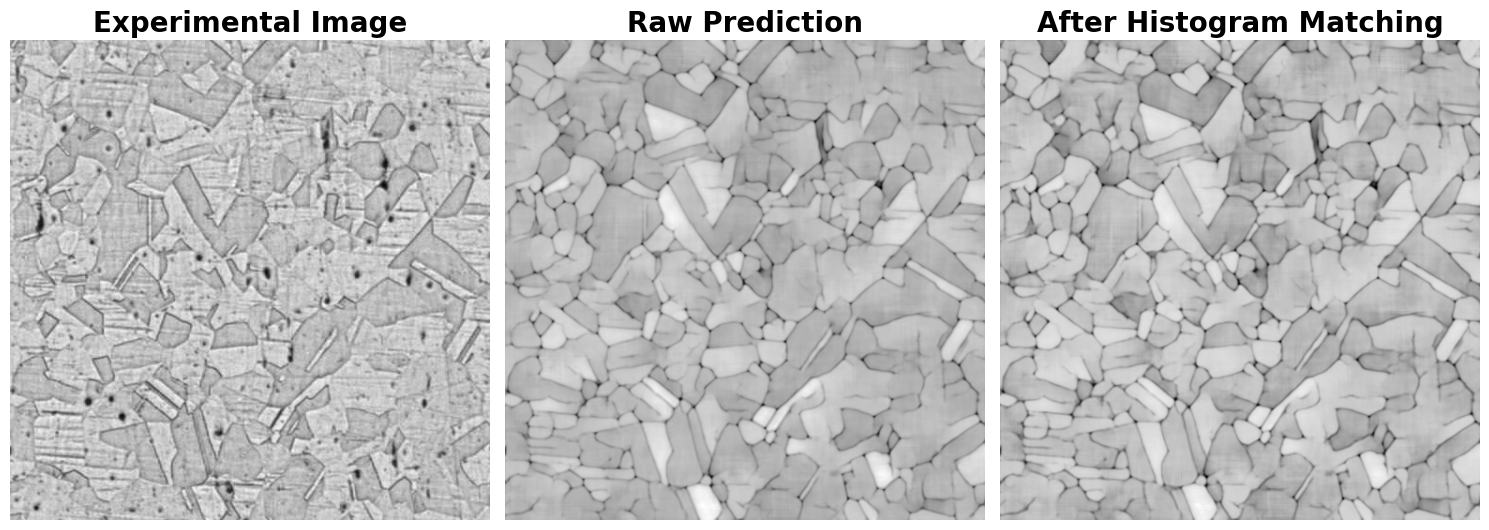

Experimental Image:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5675
  Std Dev: 0.0557

Raw Prediction:
  Min: 0.2576
  Max: 0.7023
  Mean: 0.5719
  Std Dev: 0.0369

After Histogram Matching:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5656
  Std Dev: 0.0557



In [ ]:
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.where(tf.math.is_nan(mse), 1e6, mse)  # Handle NaN values

model2 = tf.keras.models.load_model('/microstructures/optical_micro/noisy_set/model_v1.h5', custom_objects={'combined_loss': combined_loss})

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters
import tensorflow as tf

def preprocess_image(image_path):
    img = io.imread(image_path, as_gray=True)
    img = transform.resize(img, (512, 512), anti_aliasing=True)
    img = img 
    threshold = filters.threshold_otsu(img)
    binary_img = (img > threshold).astype(np.float32)
    binary_img = binary_img.reshape(1, 512, 512, 1)
    return img, binary_img

image_path = '/microstructures/optical_micro/noise_micro_shortlisted/512x512_patches/1000-5m_500-sb 50x0005_patch_x1024_y411.png'

original_img, binary_img = preprocess_image(image_path)
img = original_img.reshape(1, 512, 512, 1)

print(f"Image range: {np.min(img):.4f} to {np.max(img):.4f}")

# Make prediction
raw_prediction = model2.predict(img)

def match_histograms(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

# Apply histogram matching
matched_prediction = match_histograms(raw_prediction, original_img)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Images
titles = ['Experimental Image', 'Raw Prediction', 'After Histogram Matching']
images = [original_img, raw_prediction[0, ..., 0], matched_prediction[0, ..., 0]]

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i], fontsize=20, fontweight='bold')
    axs[i].axis('off')

plt.tight_layout()
plt.savefig("./supply_fig2.pdf", bbox_inches='tight')
plt.show()

# Print some statistics
for title, image in zip(titles, images):
    print(f"{title}:")
    print(f"  Min: {np.min(image):.4f}")
    print(f"  Max: {np.max(image):.4f}")
    print(f"  Mean: {np.mean(image):.4f}")
    print(f"  Std Dev: {np.std(image):.4f}")
    print()

  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Selected image shape: (512, 512)
Image range: 0.1529 to 0.7255
Shape of Simulated Image: (512, 512)
Shape of Raw Prediction: (512, 512)
Shape of After Histogram Matching: (512, 512)


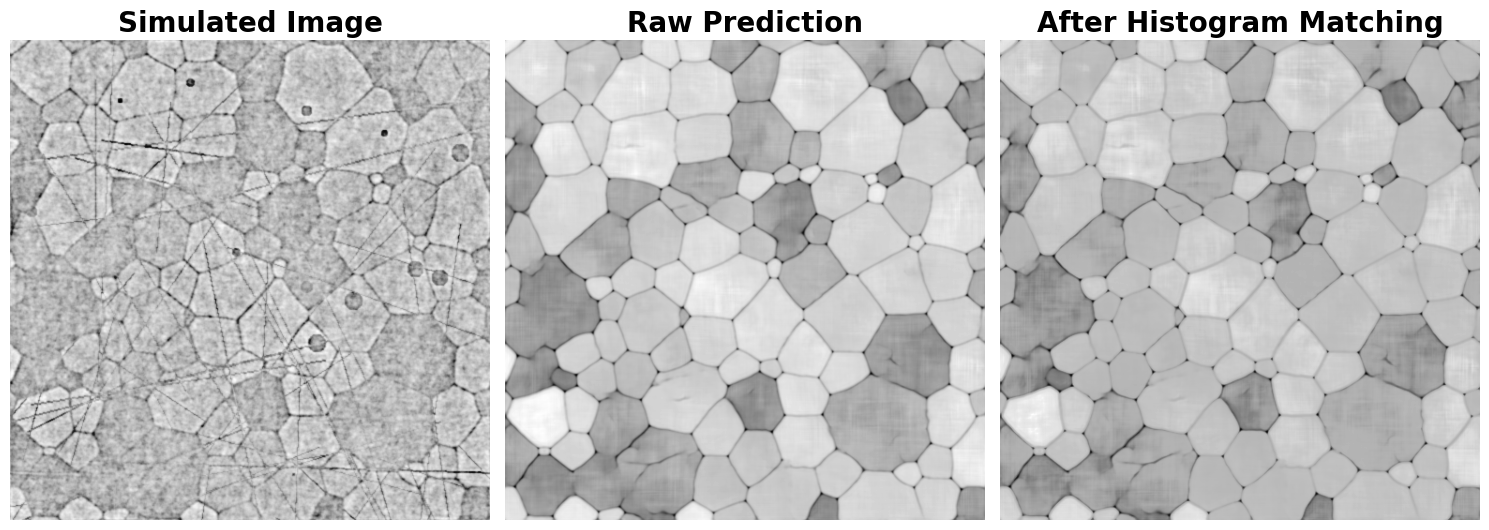

Simulated Image:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5656
  Std Dev: 0.0557

Raw Prediction:
  Min: 0.2495
  Max: 0.6720
  Mean: 0.5682
  Std Dev: 0.0513

After Histogram Matching:
  Min: 0.1529
  Max: 0.7255
  Mean: 0.5656
  Std Dev: 0.0557



In [ ]:
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.where(tf.math.is_nan(mse), 1e6, mse)  # Handle NaN values

model2 = tf.keras.models.load_model('/microstructures/optical_micro/noisy_set/model_v1.h5', custom_objects={'combined_loss': combined_loss})

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters
import tensorflow as tf

# Load the X data
X = np.load("/microstructures/optical_micro/noise_micro_shortlisted/train_data_new/X.npy")
selected_image = X[2300]  # Select image at index 3300
print(f"Selected image shape: {selected_image.shape}")

# Reshape for model input while preserving original dimensions for display
img = selected_image.reshape(1, 512, 512, 1)  # Add batch and channel dimensions
original_img = selected_image.reshape(512, 512)  # Reshape to 2D for display

print(f"Image range: {np.min(img):.4f} to {np.max(img):.4f}")

# Make prediction
raw_prediction = model2.predict(img)

def match_histograms(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

# Apply histogram matching
matched_prediction = match_histograms(raw_prediction, original_img)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Images - ensure all are 2D arrays
titles = ['Simulated Image', 'Raw Prediction', 'After Histogram Matching']
images = [
    original_img,  # Already 2D
    raw_prediction[0, ..., 0],  # Remove batch and channel dimensions
    matched_prediction[0, ..., 0] if matched_prediction.ndim == 4 else matched_prediction[..., 0]  # Handle both cases
]

# Verify shapes before plotting
for i, img in enumerate(images):
    print(f"Shape of {titles[i]}: {img.shape}")

for i in range(3):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i], fontsize=20, fontweight='bold')
    axs[i].axis('off')

plt.tight_layout()
# plt.savefig("./supply_fig1.pdf", bbox_inches='tight')
plt.show()

# Print some statistics
for title, image in zip(titles, images):
    print(f"{title}:")
    print(f"  Min: {np.min(image):.4f}")
    print(f"  Max: {np.max(image):.4f}")
    print(f"  Mean: {np.mean(image):.4f}")
    print(f"  Std Dev: {np.std(image):.4f}")
    print()

  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Image range: 0.1725 to 0.7686


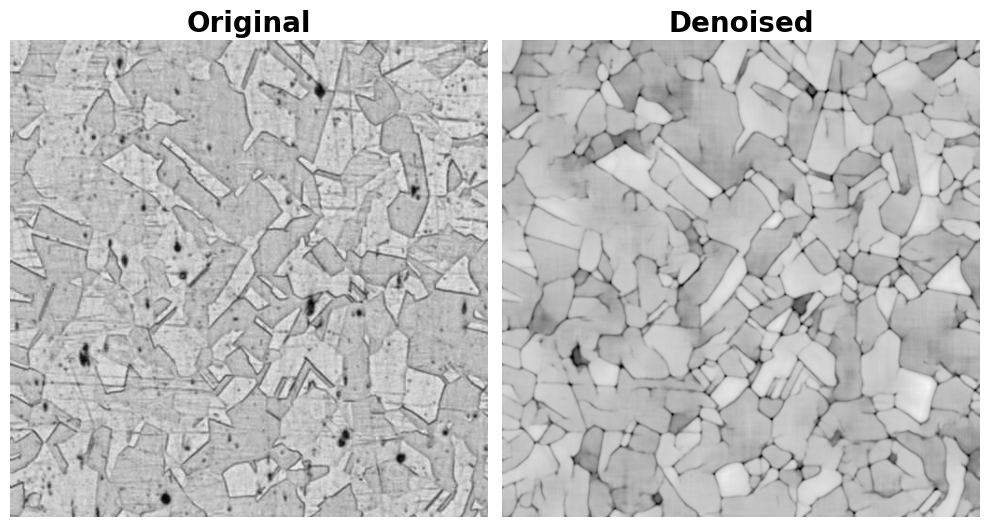

Original:
  Min: 0.1725
  Max: 0.7686
  Mean: 0.5988
  Std Dev: 0.0593

Denoised:
  Min: 0.1725
  Max: 0.7686
  Mean: 0.5968
  Std Dev: 0.0593



In [ ]:
def combined_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.where(tf.math.is_nan(mse), 1e6, mse)  # Handle NaN values

model2 = tf.keras.models.load_model('/microstructures/optical_micro/noisy_set/model_v1.h5', custom_objects={'combined_loss': combined_loss})

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters
import tensorflow as tf

def preprocess_image(image_path):
    img = io.imread(image_path, as_gray=True)
    img = transform.resize(img, (512, 512), anti_aliasing=True)
    img = img 
    threshold = filters.threshold_otsu(img)
    binary_img = (img > threshold).astype(np.float32)
    binary_img = binary_img.reshape(1, 512, 512, 1)
    return img, binary_img

image_path = '/microstructures/optical_micro/noise_micro_shortlisted/512x512_patches/1000-5m_500-sb 50x0003_patch_x0_y0.png'

original_img, binary_img = preprocess_image(image_path)
img = original_img.reshape(1, 512, 512, 1)

print(f"Image range: {np.min(img):.4f} to {np.max(img):.4f}")

# Make prediction
raw_prediction = model2.predict(img)

def match_histograms(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

# Apply histogram matching
matched_prediction = match_histograms(raw_prediction, original_img)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Images
titles = ['Original', 'Denoised']
images = [original_img, matched_prediction[0, ..., 0]]

for i in range(2):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i], fontsize=20, fontweight='bold')
    axs[i].axis('off')

plt.tight_layout()
plt.savefig("./supply_fig3_2.png", bbox_inches='tight',dpi = 200)
plt.show()

# Print some statistics
for title, image in zip(titles, images):
    print(f"{title}:")
    print(f"  Min: {np.min(image):.4f}")
    print(f"  Max: {np.max(image):.4f}")
    print(f"  Mean: {np.mean(image):.4f}")
    print(f"  Std Dev: {np.std(image):.4f}")
    print()